# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images.

## Step 0: Functions required from [fastai](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L194)
```
$ conda install -c fastai fastai
$ conda install -c pytorch pytorch-cpu torchvision
``` 

[Useful information](https://docs.fast.ai/install.html) about installation of libraries and dependencies of fastai and PyTorch

In [1]:
from fastai.vision import *

## Step 1: Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Get the [gi2ds bookmark](http://bskog.com/ai/2018/10/30/creating-dataset-google-image-search-results/) to remove unwanted imagery. This is written by Christoffer Björkskog.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Make directories for all the classes

In [2]:
classes = ['teddys','grizzly','black']
for c in classes:
    path = Path('data/bears')
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)

### Upload urls file into your server
The Jupyter Notebook Upload tab can be used to download easily from the local PC. Or use scp, for upload to my GCP server I used the following in my local command line:

```
$ gcloud compute scp ~/Downloads/urls_grizzly.txt jupyter@my-fastai-instance:~/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly

$ gcloud compute scp ~/Downloads/urls_black.txt jupyter@my-fastai-instance:~/tutorials/fastai/course-v3/nbs/dl1/data/bears/black 
   
$ gcloud compute scp ~/Downloads/urls_teddys.txt jupyter@my-fastai-instance:~/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys
```

## Step 2: Download images

Now you will need to download you images from their respective urls.

You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [3]:
path = os.path.join(os.getcwd(), path)
path

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears'

In [4]:
def download_images_from_urls():
    '''Download jpgs from a txt file of urls to an images folder.'''
    
    for c in classes:
        image_location = os.path.join(path, c)
        filename = 'urls_' + c + '.txt'
        url_file_path = os.path.join(image_location, filename)
        download_images(url_file_path, image_location, max_pics=200)
        print('Files downloaded from: ', c, '\nNumber of files: ', len(os.listdir(image_location)))
        verify_images(image_location, delete=True, max_size=500)

In [5]:
%%time
download_images_from_urls()

Error https://images.harrods.com/product/harrods-of-london/mohair-teddy-bear-24cm_000000005675941001.jpg?dwn=767px:873px HTTPSConnectionPool(host='images.harrods.com', port=443): Read timed out. (read timeout=4)
Error http://images.harrods.com/product/harrods/my-harrods-teddy-bear_000000000003768635.jpg HTTPConnectionPool(host='images.harrods.com', port=80): Max retries exceeded with url: /product/harrods/my-harrods-teddy-bear_000000000003768635.jpg (Caused by ReadTimeoutError("HTTPConnectionPool(host='images.harrods.com', port=80): Read timed out. (read timeout=4)"))
Files downloaded from:  teddys 
Number of files:  199


Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000164.png has 4 instead of 3 channels
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000169.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000138.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000016.png'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000073.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000083.jpg'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000116.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/00000102.jpg'>
cann

Error https://www.pc.gc.ca/en/pn-np/mtn/ours-bears/gestion-management/humains-people/~/media/413A5729D43B41D29981E686318F1A3B.ashx?w=595&h=347&as=1 HTTPSConnectionPool(host='www.pc.gc.ca', port=443): Max retries exceeded with url: /en/pn-np/mtn/ours-bears/gestion-management/humains-people/~/media/413A5729D43B41D29981E686318F1A3B.ashx?w=595&h=347&as=1 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fe2b9e330f0>, 'Connection to www.pc.gc.ca timed out. (connect timeout=4)'))
Error https://igbconline.org/wp-content/uploads/2016/02/grizzly-bear-upclose-igbc.jpg HTTPSConnectionPool(host='igbconline.org', port=443): Max retries exceeded with url: /wp-content/uploads/2016/02/grizzly-bear-upclose-igbc.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'igbconline.org' doesn't match either of '*.web-hosting.com', 'web-hosting.com'")))
Error https://www.washingtonpost.com/resizer/rNWQ6oDst_gqJ_khkSXYRtftUz4=/1484x0/arc-anglerfish-washpost-prod-washp

cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000112.png'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000021.jpg'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000183.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000148.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tu

Error https://caldwellzoo.org/wp-content/uploads/2017/04/NORTH-AMERICAN-BLACK-BEAR.jpg HTTPSConnectionPool(host='caldwellzoo.org', port=443): Max retries exceeded with url: /wp-content/uploads/2017/04/NORTH-AMERICAN-BLACK-BEAR.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.washingtonpost.com/resizer/dMEj0BS8qwfEGw3vF6hyJPLivCI=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/DHCIEQXYSAI6NKQ6L5ZV5YYTGQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Files downloaded from:  black 
Number of files:  199


cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000182.jpg'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000177.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000083.jpg'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000140.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000005.png'>
Image /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000003.gif has 1 instead of 3 

## View data

Set aside 20% of the data for validation. Use random seed to get the same validation set each time. Say some (hyper)parameters are changed, it is important to use the same dataset to validate the model, if it is different every time then changed validation data could be the reason the model is doing better or worse based on the parameters that are tweeked. 

In [62]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [63]:
data.classes

['black', 'grizzly', 'teddys']

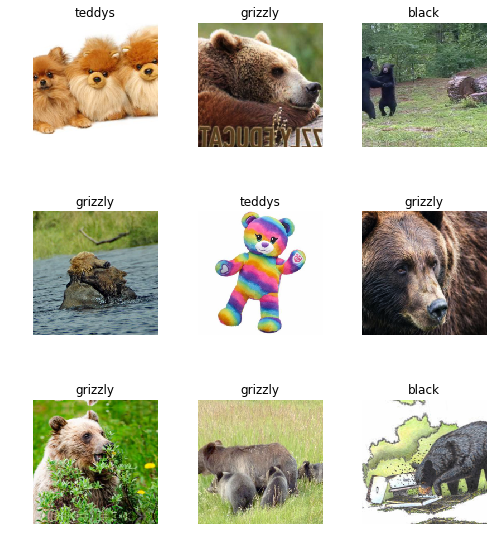

In [47]:
data.show_batch(rows=3, figsize=(7,8))

In [48]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 421, 105)

## Train model

In [64]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.999910,0.275663,0.085714
2,0.538945,0.188239,0.057143
3,0.371775,0.217895,0.057143
4,0.287012,0.219306,0.057143


looks pretty good at 5% error

In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


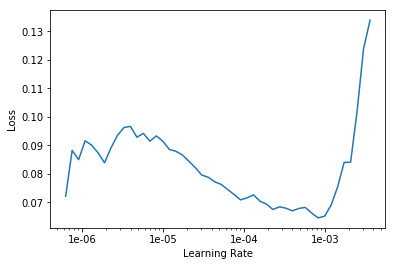

In [16]:
learn.recorder.plot()

looks like the learning rate got worse and then started to improve.

In [17]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4)) #lr 0.00003, 0.0003

epoch,train_loss,valid_loss,error_rate
1,0.105338,0.230779,0.066667
2,0.071265,0.223117,0.057143


In [18]:
learn.save('stage-2')

## Interpretation

In [19]:
learn.load('stage-2');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

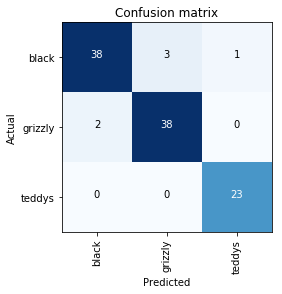

In [21]:
interp.plot_confusion_matrix()

## Cleaning Up
**Mis-labelled data and duplicate data**

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [22]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with .from_toplosses. We then feed the top losses indexes and corresponding dataset to ImageCleaner.

Notice that the widget will not delete images directly from disk but it will create a new csv file cleaned.csv from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [35]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [36]:
path = Path('data/bears')
ImageCleaner(ds, idxs, path=path)
# https://forums.fast.ai/t/imagecleaner-missing-argument-in-lesson-2-download-notebook/36537/17

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [37]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [38]:
ImageCleaner(ds, idxs, path=path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

In [39]:
doc(DatasetFormatter)

In [40]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [41]:
ImageCleaner(ds, idxs, path=path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [42]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Train)

Getting activations...


Computing similarities...


In [43]:
ImageCleaner(ds, idxs, path=path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Once the nosiy images are cleaned out I can re-run the model to see if there are better results. 

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [49]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [50]:
defaults.device = torch.device('cpu')

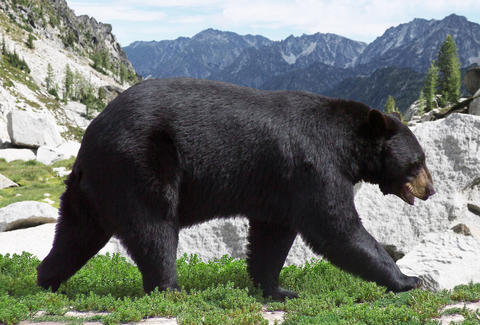

In [51]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [52]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [54]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [56]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate
1,21.108931,10313957.000000,0.600000


look at validation loss, its way too high.

### Learning rate (LR) too low

In [57]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [58]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate
1,1.342234,1.194812,0.580952
2,1.372264,1.124056,0.552381
3,1.386087,1.083530,0.561905
4,1.366766,1.063259,0.561905
5,1.346485,1.066332,0.514286


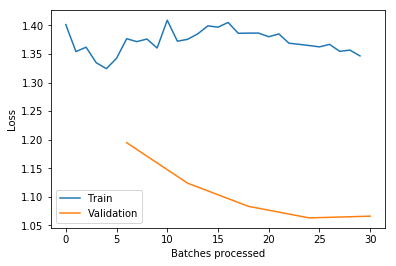

In [59]:
learn.recorder.plot_losses()

Two things:
- really slow loss changes as seen in plot_losses, learning rate too low. 
- for each epoch if the training loss is higher than the validation loss then it learning rate is too low.

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [65]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [66]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,1.273534,0.950268,0.523810


again, the training loss is higher than the validation loss not even training. 

### Too many epochs

In [67]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [68]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [69]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.440250,1.266162,0.716702
2,1.406779,1.228205,0.691332
3,1.384712,1.193625,0.684989
4,1.352405,1.159436,0.657505
5,1.297266,1.116791,0.638478
6,1.268838,1.062516,0.604651
7,1.199437,0.998828,0.564482
8,1.130181,0.922116,0.490486
9,1.058631,0.836055,0.372093
10,0.983875,0.749187,0.281184


When overfitting the model starts to recognise certain images in the dataset, so when seeing a new validation or test set the model won't be able to generalise well enough to get high accuracy. 

It is very difficult to overfit. It has taken many epochs, and overfitting can be recognised when the error_rate gets better then begins to get worse. 

If your training loss is lower than validation loss, this is NOT overfitting. It is a sign you have done something right. **The model is overfitting when the error_rate is getting worse.**